In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def init(size_layers):

    para={}
    L=len(size_layers)

    for l in range(1,L):
        para[f'w{l}']=np.random.randn(size_layers[l],size_layers[l-1])*0.01
        para[f'b{l}']=np.zeros((size_layers[l],1))
    return para 

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
def for_propagation(X,para):
    activ={'a0':X}
    L=len(para)//2
    for l in range(1,L+1):
        w=para[f'w{l}']
        b=para[f'b{l}']
        z=np.dot(w,activ[f'a{l-1}'])+b
        a=sigmoid(z)
        activ[f'z{l}']=z
        activ[f'a{l}']=a
    return activ


In [5]:
def back_pro(y,para,activ):
    gradients={}
    m=y.shape[1]
    L=len(para)//2
    gradients[f'dz{L}']=activ[f'a{L}']-y
    gradients[f'w{L}']=(1/m) * np.dot(gradients[f'dz{L}'],activ[f'a{L-1}'].T)
    gradients[f'db{L}']=(1/m)*np.sum(gradients[f'dz{L}'],axis=1,keepdims=True)
    for l in reversed(range(1,L)):
        w_next=para[f'w{l+1}']
        dz_next=gradients[f'dz{l+1}']

        gradients[f'dz{l}']=np.dot(w_next.T,dz_next)*activ[f'a{l}']*(1-activ[f'a{l}'])  #activ[f'a{l}']*(1-activ[f'a{l}']) derivative of the sigmoid s(x)*(1-S(x))
        gradients[f'dw{l}']=(1/m)*np.dot(gradients[f'dz{l}'],activ[f'a{l-1}'].T)
        gradients[f'db{l}']=(1/m)*np.sum(gradients[f'dz{l}'],axis=1,keepdims=True)
    return gradients




In [6]:
def update(para,gradients,lr):
    L=len(para)//2
    for l in range(1,L):
        para[f'w{l}']-=lr*gradients[f'dw{l}'] 
        para[f'b{l}']-=lr*gradients[f'db{l}']
    return para

In [7]:
def predict(X,para):
    L=len(para)//2
    activ=for_propagation(X,para)
    y_pred=activ[f'a{L}']
    return (y_pred >= 0,5).astype(int)

In [8]:
def train(X, y, sizes, lr=0.1, n_iter=1000):
    parameters = init(sizes)
    losses = []
    accuracies = []
    
    for i in range(n_iter):
        activations = for_propagation(X, parameters)
        A = activations[f'a{len(sizes)-1}']
        
        loss = -np.mean(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))
        y_pred = (A>= 0.5).astype(int)
        acc = np.mean(y == y_pred)
        
        gradients = back_pro(y, parameters, activations)
        parameters = update(parameters, gradients, lr)
        
        
        losses.append(loss)
        accuracies.append(acc)
      
    
    return parameters, losses, accuracies


In [14]:
sizes = [2, 5, 3, 1]


from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
y = y.reshape(-1, 1)
X, y = X.T, y.T  
X = (X - np.min(X)) / (np.max(X) - np.min(X))

para,loses,accur =train(X,y,sizes,lr=1,n_iter=42400)
loses

[0.6931481361932659,
 0.693148136181944,
 0.6931481361706224,
 0.6931481361593009,
 0.6931481361479797,
 0.6931481361366585,
 0.6931481361253372,
 0.6931481361140162,
 0.6931481361026952,
 0.6931481360913747,
 0.6931481360800541,
 0.6931481360687337,
 0.6931481360574135,
 0.6931481360460932,
 0.6931481360347732,
 0.6931481360234532,
 0.6931481360121333,
 0.6931481360008136,
 0.6931481359894944,
 0.693148135978175,
 0.6931481359668556,
 0.6931481359555366,
 0.6931481359442176,
 0.6931481359328987,
 0.6931481359215801,
 0.6931481359102614,
 0.6931481358989429,
 0.6931481358876246,
 0.6931481358763064,
 0.6931481358649882,
 0.6931481358536703,
 0.6931481358423527,
 0.6931481358310352,
 0.6931481358197175,
 0.6931481358084003,
 0.6931481357970829,
 0.6931481357857656,
 0.6931481357744488,
 0.693148135763132,
 0.6931481357518153,
 0.6931481357404986,
 0.6931481357291821,
 0.6931481357178658,
 0.6931481357065497,
 0.6931481356952335,
 0.6931481356839174,
 0.6931481356726017,
 0.6931481356612

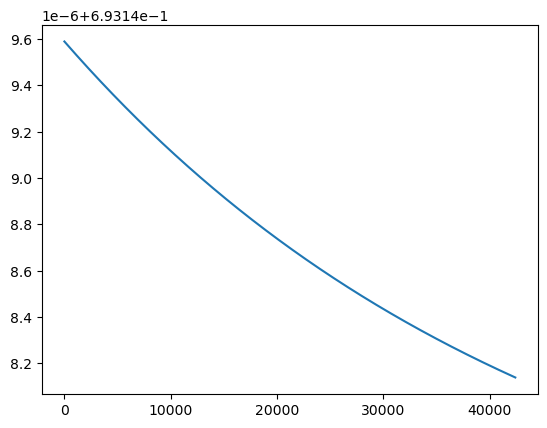

In [10]:
plt.plot(loses)

In [15]:
#accucy plotting 

